# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

#### Project Purpose

The purpose of this project is to examine the relationships that exist between the price of a vehicle and various factors of interest that are specified at the time of ad listing.

#### Plan of Action

To complete this project, the dataset will be examined in order to determine the rows with missing values, incorrect data types and potential outliers that should be treated or excluded from the analysis. Once the data is cleaned, the core parameters, price, age, mileage, number of cylinders, and condition of each vehicle will be studied using histograms, boxplots, and scatterplots. Then, after determining which vehicle types had the highest number of ad listings, the two highest types will be used to analyze whether the price depends on age, mileage, condition, transmission type, and color using correlation matrices and plots.

## Initialization

In [89]:
# Load all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


The pandas, numpy, and pyplot libraries were loaded to utilize in the analysis. Import warnings to prevent filter warnings from appearing in the output.

### Load data

In [90]:
# Load the data file into a DataFrame
vehicles_us = pd.read_csv('/datasets/vehicles_us.csv')


The data file was loaded as the dataframe 'vehicles_us'.

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [91]:
# Print the general/summary information about the dataframe
vehicles_us.info()
vehicles_us.describe(include = 'all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [92]:
# Print a sample of data
print(vehicles_us.head(20))


    price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
1   25500         NaN                ford f-150       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        NaN  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   
11   8990      2012.0              honda accord  excellent      

In the dataset vehicles_us, there are **51525 rows and 13 columns.**

Based on the general information and printed data sample above, the following are potential issues that may warrant further investigation and change:

**1) Missing values:**
The 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd' columns contain missing values.

**2) Incorrect data types:**
The 'model_year', 'cylinders', 'odometer', and 'is_4wd' columns are float values though they should be integer values for greater efficiency. The 'date_posted' column is also inputted as string values though they should be datetime values.

**3) Problematic values:**
The spread of values in the 'odometer' column are quite large, ranging from 0 to 990,000. Although such extreme values may technically be plausible, they should be examined closely to ensure that they should be included in the final analysis and not dropped.

### Conclusions and further steps

Due to the issues noted above--missing values, incorrect data types, and problematic values--the following will be the plan of action to ensure that the data is made suitable for the required analysis:

1) Missing values will be examined and addressed as deemed necessary. If a variable is determined to be a characteristic that may be accurately extrapolated from the available set of non-missing data, it will be filled.

2) The columns containing inappropriate float values will be changed to integer types and the data in the 'date_posted' column will be changed from string to datetime values.

3) A boxplot will be used to visualize the data in the 'odometer' column and the potential outliers will be determined and removed as deemed necessary.

## Treat missing values

In [93]:
# Print the number of missing values found in each column
vehicles_us.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [94]:
# Calculate the Pearson correlation coefficient for every pair of numeric columns
vehicles_us.corr()


,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


Though there are 5 columns that contain missing data in the dataset, only the 'cylinders' and 'is_4wd' columns seem appropriate to fill. The reason being that the values in the 'cylinders' are relatively standardized based on the type of vehicle and the missing values in the 'is_4wd' column are simply vehicles that are not 4 wheel drive which means they can be filled in with a value of 0. Due to the highly variable and subjective nature of the 'model_year', 'odometer', and 'paint_color' columns, as well as the low level of correlation that is indicated for the numeric columns based on the Pearson correlation coefficients above, it does not seem appropriate to extrapolate values to fill in the missing values. Therefore, they will not be filled in or dropped in order to preserve as much of the data as possible for the remainder of the analysis.

In [95]:
# Fill in the missing values in the'is_4wd' to '0'
vehicles_us['is_4wd'].fillna(0, inplace = True)


In [96]:
# Check to make sure the 'is_4wd' column was successfully filled in
vehicles_us.isna().sum()


price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

The fill_na() method was utilized to fill the missing values in the 'is_4wd' column in with a value of 0. The isna() method was used to confirm that the missing values were appropriately filled.

In [97]:
# Look at the median values for 'cylinders' based on the 'type' column
cylinders_by_type = vehicles_us.groupby(['type'])['cylinders'].median()
print(cylinders_by_type)


type
SUV             6.0
bus            10.0
convertible     8.0
coupe           6.0
hatchback       4.0
mini-van        6.0
offroad         6.0
other           6.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           4.0
Name: cylinders, dtype: float64


The median values of the 'cylinders' column by the 'type' column were generated and showed reasonable estimations for the number of cylinders that can be used to fill the missing data in the column.

In [98]:
# Create a new column containing a list of string values from the 'type' and 'cylinders' column for each row to be used in the following 'fill_cylinders' function
vehicles_us['filler'] = vehicles_us[['type', 'cylinders']].values.tolist()


In [99]:
# Write a function that we will use for filling in missing values in the 'cylinders' column
def fill_cylinders(filler):
    if pd.isna(filler[1]):
        return vehicles_us[(vehicles_us['type'] == filler[0])]['cylinders'].median()
    else:
        return filler[1]
    

A new column called 'filler' was created in 'vehicles_us' that contains a list of string values from the 'type' and 'cylinders' columns which are needed as inputs for the function 'fill_cylinders' which is designed to fill in missing values in the 'cylinders' column.

In [100]:
# Check if the function works based on the results of the grouping above
fill_cylinders(['SUV', float('NaN')])


6.0

In [101]:
# Check if the function works in the case that it encounters a non-missing value in the 'cylinders' column
fill_cylinders(['SUV', 10])


10

The function was tested with sample inputs and returned accurate results.

In [102]:
# Apply the 'fill_cylinders' function to every row in 'cylinders' and print the first 15 rows
vehicles_us['cylinders'] = vehicles_us['filler'].apply(fill_cylinders)
vehicles_us.head(15)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,filler
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,"[SUV, 6.0]"
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,"[pickup, 6.0]"
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,"[sedan, 4.0]"
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,"[pickup, 8.0]"
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,"[sedan, 4.0]"
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,"[sedan, 6.0]"
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,"[sedan, 4.0]"
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,"[SUV, 6.0]"
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,"[SUV, 4.0]"
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,"[SUV, nan]"


In [103]:
# Make sure that the 'cylinders' column was appropriately filled in and no longer contains missing values
vehicles_us.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
filler          51525 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


The 'fill_cylinders' function was applied to the 'cylinders' column to fill in all the missing values with the median cylinder values by type. The summary of the dataset revealed that the application of the function was successful as there are no longer missing values in the 'cylinders' column.

## Fix data types

With the missing values addressed, the float values in the 'model_year', 'cylinders', 'odometer', and 'is_4wd' columns will be changed to integer values and the string values in the 'date_posted' column will be changed to datetime values.

In [104]:
# Change the float type 'model_year' column to integer type
vehicles_us['model_year'] = vehicles_us['model_year'].astype('Int64')


In [105]:
# Check to ensure the change to integer type was successful
print(vehicles_us['model_year'])


0        2011
1         NaN
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: Int64


In [106]:
# Change the float type 'cylinders' column to integer type
vehicles_us['cylinders'] = vehicles_us['cylinders'].astype('Int64')


In [107]:
# Check to ensure the change to integer type was successful
print(vehicles_us['cylinders'])


0        6
1        6
2        4
3        8
4        4
        ..
51520    6
51521    4
51522    4
51523    4
51524    4
Name: cylinders, Length: 51525, dtype: Int64


In [108]:
# Change the float type 'odometer' column to integer type
vehicles_us['odometer'] = vehicles_us['odometer'].astype('Int64')


In [109]:
# Check to ensure the change to integer type was successful
print(vehicles_us['odometer'])


0        145000
1         88705
2        110000
3           NaN
4         80903
          ...  
51520     88136
51521    181500
51522    128000
51523    139573
51524       NaN
Name: odometer, Length: 51525, dtype: Int64


In [110]:
# Change the float type 'is_4wd' column to integer type
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].astype('Int64')


In [111]:
# Check to ensure the change to integer type was successful
print(vehicles_us['is_4wd'])


0        1
1        1
2        0
3        0
4        0
        ..
51520    0
51521    0
51522    0
51523    0
51524    0
Name: is_4wd, Length: 51525, dtype: Int64


The float values in the 'model_year', 'cylinders', 'odometer', and 'is_4wd' columns were successfully changed to integer values.

In [112]:
# Change the string type 'date_posted' column to datetime type
vehicles_us['date_posted'] = pd.to_datetime(vehicles_us['date_posted'])


In [113]:
# Check to ensure the change to datetime type was successful
print(vehicles_us['date_posted'])


0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]


The string values in the 'date_posted' column was successfully changed to datetime values.

## Enrich data

In order to enrich the current dataset, additional columns with factors calculated using existing columns will be created to help with the analysis.

In [114]:
# Add columns for datetime values (day of week, month, and year) for when each ad was placed
vehicles_us['day_of_week'] = pd.DatetimeIndex(vehicles_us['date_posted']).dayofweek
vehicles_us['month'] = pd.DatetimeIndex(vehicles_us['date_posted']).month
vehicles_us['year'] = pd.DatetimeIndex(vehicles_us['date_posted']).year
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
price           51525 non-null int64
model_year      47906 non-null Int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null Int64
fuel            51525 non-null object
odometer        43633 non-null Int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null Int64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
filler          51525 non-null object
day_of_week     51525 non-null int64
month           51525 non-null int64
year            51525 non-null int64
dtypes: Int64(4), datetime64[ns](1), int64(5), object(7)
memory usage: 6.9+ MB


Columns for the day of the week, month, and year that each ad was placed were successfully generated.

In [115]:
# Add a new column to 'vehicles_us' called 'age' with each vehicle's age when the ad was placed
vehicles_us['age'] = vehicles_us['year'] - vehicles_us['model_year']
print(vehicles_us.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500         NaN      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas       NaN   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV         NaN       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup         NaN       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

          filler  day_of_week  month  year  age  
0     [SUV, 6.0]            5      6  2018    7  
1  [pickup

A new column called 'age' that contains the age of the vehicle when the ad was placed (year of ad placement minus the model year of the vehicle) was successfully generated. 

In [116]:
# Add the vehicle's average mileage per year
vehicles_us['avg_mileage'] = (vehicles_us['odometer'] / vehicles_us['age']).round(decimals = 0).astype('Int64')
print(vehicles_us.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500         NaN      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas       NaN   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV         NaN       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup         NaN       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

          filler  day_of_week  month  year  age  avg_mileage  
0     [SUV, 6.0]            5      6  2018    7

A new column called 'avg_mileage' that contains the average mileage per year of each vehicle (odometer value divided by the age of the vehicle when the ad was placed) was successfully generated.

In [117]:
# The unique values in the 'condition' column were examined in order to figure out numeric categories to assign to the condition values for ease of analysis
vehicles_us['condition'].unique()


array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [118]:
# Create a function to assign numeric categories that correspond to the various condition types
def categorize_condition(condition):
    if condition == 'salvage':
        return 0
    elif condition == 'fair':
        return 1
    elif condition == 'good':
        return 2
    elif condition == 'excellent':
        return 3
    elif condition == 'like new':
        return 4
    elif condition == 'new':
        return 5
    else:
        return "unknown"


In [119]:
# Apply the 'categorize_condition' function to the 'condition' column to create a new column called 'condition_cat'
vehicles_us['condition_cat'] = vehicles_us['condition'].apply(categorize_condition)
print(vehicles_us.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500         NaN      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas       NaN   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV         NaN       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup         NaN       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

          filler  day_of_week  month  year  age  avg_mileage  condition_cat  
0     [SUV, 6.0]            5   

The 'categorize_condition' function was created to assign numeric categories that correspond to the condition types in the 'condition' column. The function was then applied to create a new column called 'condition_cat'.

In [120]:
# Drop the 'filler' column that was temporarily created for the 'fill_cylinders' function
vehicles_us = vehicles_us.drop(columns = ['filler'], axis = 1)
print(vehicles_us.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500         NaN      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas       NaN   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV         NaN       1  2018-06-23           19   
1    automatic  pickup       white       1  2018-10-19           50   
2    automatic   sedan         red       0  2019-02-07           79   
3    automatic  pickup         NaN       0  2019-03-22            9   
4    automatic   sedan       black       0  2019-04-02           28   

   day_of_week  month  year  age  avg_mileage  condition_cat  
0            5      6  2018    7        20714  

Finally, the temporary 'filler' column used for the 'fill_cylinders' function earlier in the data cleaning process was dropped from 'vehicles_us' as it is no longer needed for the remainder of the analysis.

## Check clean data

The final cleaned 'vehicles_us' dataframe that will be used for the remainder of the analysis is displayed below:

In [121]:
# Print the general/summary information on the 'vehicles_us' dataframe
print(vehicles_us.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
price            51525 non-null int64
model_year       47906 non-null Int64
model            51525 non-null object
condition        51525 non-null object
cylinders        51525 non-null Int64
fuel             51525 non-null object
odometer         43633 non-null Int64
transmission     51525 non-null object
type             51525 non-null object
paint_color      42258 non-null object
is_4wd           51525 non-null Int64
date_posted      51525 non-null datetime64[ns]
days_listed      51525 non-null int64
day_of_week      51525 non-null int64
month            51525 non-null int64
year             51525 non-null int64
age              47906 non-null Int64
avg_mileage      38751 non-null Int64
condition_cat    51525 non-null int64
dtypes: Int64(6), datetime64[ns](1), int64(6), object(6)
memory usage: 7.8+ MB
None


In [122]:
# Print a sample of data
display(vehicles_us.head(20))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,age,avg_mileage,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,6,2018,7,20714,2
1,25500,NaN,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,NaN,NaN,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333,4
3,1500,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,4,3,2019,16,NaN,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18246,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,NaN,1,2018-07-16,19,0,7,2018,6,17362,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381,3


## Study core parameters

The core parameters are the following:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In order to study the above parameters, boxplots and histograms will be generated for each to examine the spread of the data and to identify any problems that should be resolved (primarily outliers).

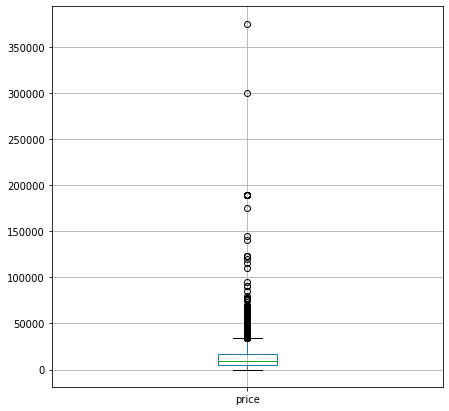

In [123]:
# Create a boxplot for the price parameter
vehicles_us['price'].plot(kind='box', figsize = (7, 7), grid = True);


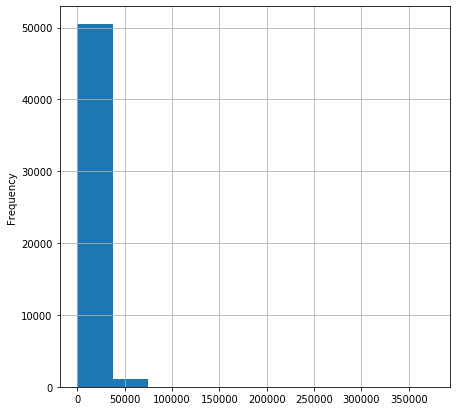

In [124]:
# Create a histogram for the price parameter
vehicles_us['price'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


Looking at the price parameter boxplot, it is clear that there are quite a few outliers that are unusually high. However, the histogram reveals that most of the data is aggregated between about \\$0-$75,000.

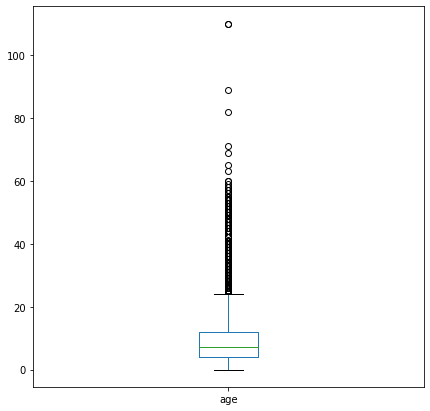

In [125]:
# Create a boxplot for the age parameter
vehicles_us['age'].plot(kind='box', figsize = (7, 7));


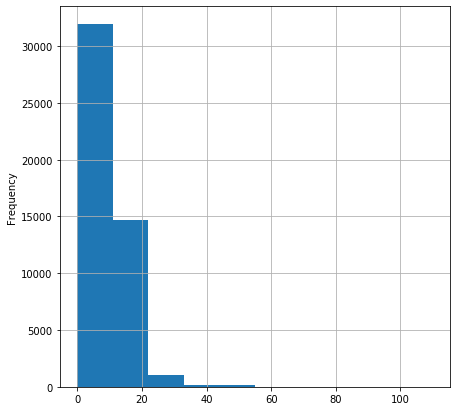

In [126]:
# Create a histogram for the age parameter
vehicles_us['age'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


The age parameter boxplot also shows quite a few outliers that are unusually high. However, the histogram reveals that most of the data is aggregated between about 1-35 years.

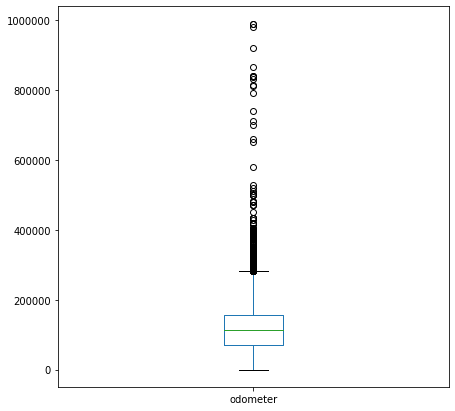

In [127]:
# Create a boxplot for the mileage parameter
vehicles_us['odometer'].plot(kind='box', figsize = (7, 7));


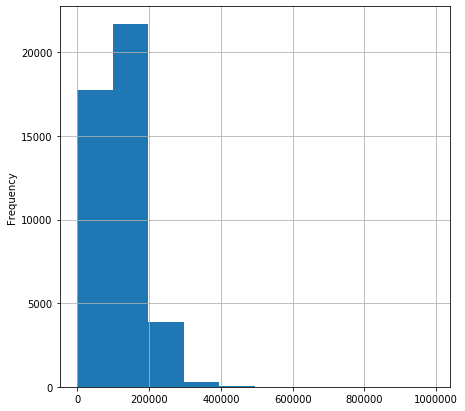

In [128]:
# Create a histogram for the mileage parameter
vehicles_us['odometer'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


Similar to the last two parameters, the mileage parameter boxplot also shows quite a few outliers that are unusually high. However, the histogram reveals that most of the data is aggregated between about 0-400,000 miles.

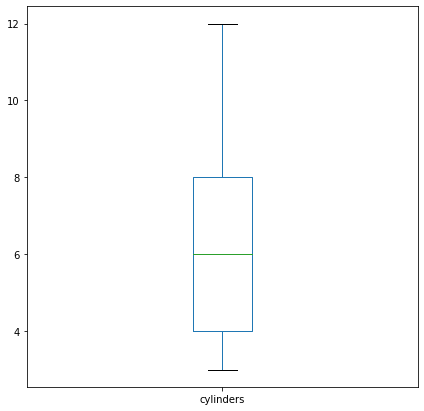

In [129]:
# Create a boxplot for the cylinders parameter
vehicles_us['cylinders'].plot(kind='box', figsize = (7, 7));


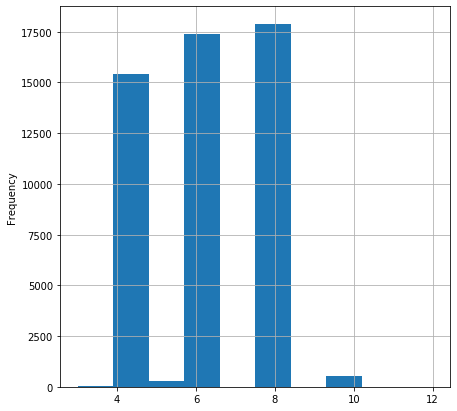

In [130]:
# Create a histogram for the cylinders parameter
vehicles_us['cylinders'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


The boxplot for the cylinders parameter shows a more even distribution of data with no outliers (due to the standardized nature of cylinders). The histogram shows that most of the vehicles have between 4-8 cylinders.

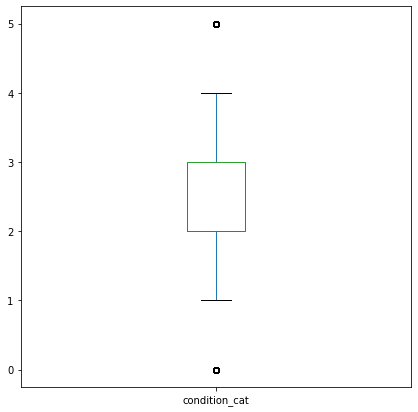

In [131]:
# Create a boxplot for the condition parameter
vehicles_us['condition_cat'].plot(kind='box', figsize = (7, 7));


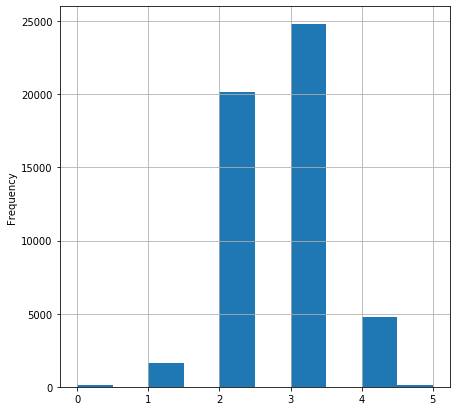

In [132]:
# Create a histogram for the condition parameter
vehicles_us['condition_cat'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


Although the boxplot for the condition parameter also shows a relatively even distribution of data, the 'salvage' and 'new' conditions are considered outliers. The histogram shows that most of the vehicles are in 'good' or 'excellent' condition.

## Study and treat outliers

Based on the graphs of the core parameters above, it seems that it would be best to remove the outliers from the 'price', 'age', and 'odometer' parameters in order to prevent them from skewing the data.

In [133]:
# Calculate the lower and upper limits for outliers in the 'price' parameter
price_q1 = vehicles_us['price'].quantile(0.25)
price_q3 = vehicles_us['price'].quantile(0.75)
price_iqr = price_q3 - price_q1
price_lower_lim = price_q1 - 1.5 * price_iqr
price_upper_lim = price_q3 + 1.5 * price_iqr


In [134]:
# Check value of the lower limit of the 'price' parameter
price_lower_lim


-12758.5

In [135]:
# Check value of the upper limit of the 'price' parameter
price_upper_lim


34597.5

The lower and upper limits for the outliers in the 'price' parameter were calculated and saved.

In [136]:
# Calculate the lower and upper limits for outliers in the 'age' parameter
age_q1 = vehicles_us['age'].quantile(0.25)
age_q3 = vehicles_us['age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_lower_lim = age_q1 - 1.5 * age_iqr
age_upper_lim = age_q3 + 1.5 * age_iqr


In [137]:
# Check value of the lower limit of the 'age' parameter
age_lower_lim


-8.0

In [138]:
# Check value of the upper limit of the 'age' parameter
age_upper_lim


24.0

The lower and upper limits for the outliers in the 'age' parameter were calculated and saved.

In [139]:
# Calculate the lower and upper limits for outliers in the 'odometer' parameter
odometer_q1 = vehicles_us['odometer'].quantile(0.25)
odometer_q3 = vehicles_us['odometer'].quantile(0.75)
odometer_iqr = odometer_q3 - odometer_q1
odometer_lower_lim = odometer_q1 - 1.5 * odometer_iqr
odometer_upper_lim = odometer_q3 + 1.5 * odometer_iqr


In [140]:
# Check value of the lower limit of the 'odometer' parameter
odometer_lower_lim


-57500.0

In [141]:
# Check value of the upper limit of the 'odometer' parameter
odometer_upper_lim


282500.0

The lower and upper limits for the outliers in the 'odometer' parameter were calculated and saved.

In [142]:
# Create a copy of the 'vehicles_us' dataframe and save as 'new_vehicles_us'. Remove rows with outliers in the 'price' columm in 'new_vehicles_us'
new_vehicles_us = vehicles_us
new_vehicles_us = new_vehicles_us[(new_vehicles_us['price'] > price_lower_lim) & (new_vehicles_us['price'] < price_upper_lim)]
new_vehicles_us.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49879 entries, 0 to 51524
Data columns (total 19 columns):
price            49879 non-null int64
model_year       46348 non-null Int64
model            49879 non-null object
condition        49879 non-null object
cylinders        49879 non-null Int64
fuel             49879 non-null object
odometer         42252 non-null Int64
transmission     49879 non-null object
type             49879 non-null object
paint_color      40900 non-null object
is_4wd           49879 non-null Int64
date_posted      49879 non-null datetime64[ns]
days_listed      49879 non-null int64
day_of_week      49879 non-null int64
month            49879 non-null int64
year             49879 non-null int64
age              46348 non-null Int64
avg_mileage      37928 non-null Int64
condition_cat    49879 non-null int64
dtypes: Int64(6), datetime64[ns](1), int64(6), object(6)
memory usage: 7.9+ MB


A copy of 'vehicles_us' was saved into a new dataframe called 'new_vehicles_us' in order to have a separate dataframe where the outliers are removed. Based on the lower and upper outlier limits calculated above, rows with outliers from the 'price' column were removed from 'new_vehicles_us'.

In [143]:
# Remove rows with outliers in the 'age' columm in 'new_vehicles_us'
new_vehicles_us = new_vehicles_us[(new_vehicles_us['age'] > age_lower_lim) & (new_vehicles_us['age'] < age_upper_lim)]
new_vehicles_us.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45494 entries, 0 to 51524
Data columns (total 19 columns):
price            45494 non-null int64
model_year       45494 non-null Int64
model            45494 non-null object
condition        45494 non-null object
cylinders        45494 non-null Int64
fuel             45494 non-null object
odometer         38525 non-null Int64
transmission     45494 non-null object
type             45494 non-null object
paint_color      37303 non-null object
is_4wd           45494 non-null Int64
date_posted      45494 non-null datetime64[ns]
days_listed      45494 non-null int64
day_of_week      45494 non-null int64
month            45494 non-null int64
year             45494 non-null int64
age              45494 non-null Int64
avg_mileage      37201 non-null Int64
condition_cat    45494 non-null int64
dtypes: Int64(6), datetime64[ns](1), int64(6), object(6)
memory usage: 7.2+ MB


Based on the lower and upper outlier limits calculated above, rows with outliers from the 'age' column were removed from 'new_vehicles_us'.

In [144]:
# Remove rows with outliers in the 'odometer' columm in 'new_vehicles_us'
new_vehicles_us = new_vehicles_us[(new_vehicles_us['odometer'] > odometer_lower_lim) & (new_vehicles_us['odometer'] < odometer_upper_lim)]
new_vehicles_us.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38102 entries, 0 to 51523
Data columns (total 19 columns):
price            38102 non-null int64
model_year       38102 non-null Int64
model            38102 non-null object
condition        38102 non-null object
cylinders        38102 non-null Int64
fuel             38102 non-null object
odometer         38102 non-null Int64
transmission     38102 non-null object
type             38102 non-null object
paint_color      31282 non-null object
is_4wd           38102 non-null Int64
date_posted      38102 non-null datetime64[ns]
days_listed      38102 non-null int64
day_of_week      38102 non-null int64
month            38102 non-null int64
year             38102 non-null int64
age              38102 non-null Int64
avg_mileage      36780 non-null Int64
condition_cat    38102 non-null int64
dtypes: Int64(6), datetime64[ns](1), int64(6), object(6)
memory usage: 6.0+ MB


Based on the lower and upper outlier limits calculated above, rows with outliers from the 'odometer' column were removed from 'new_vehicles_us'.

## Study core parameters without outliers

Using the dataframe 'new_vehicles_us' which omits rows with outliers in the 'price', 'age', and 'odometer' columns, the core parameters will be re-examined.

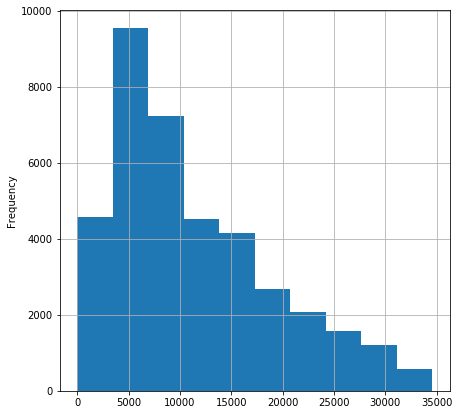

In [145]:
# Create a new histogram for the price parameter
new_vehicles_us['price'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


Without the outliers skewing the data in the 'price' column, the data looks more evenly distributed with higher frequencies between about \\$0-$10,000 and gradually decreasing frequencies as the price increases in value.

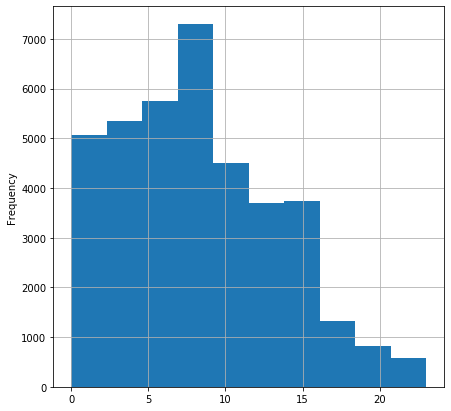

In [146]:
# Create a new histogram for the age parameter
new_vehicles_us['age'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


Without the outliers skewing the data in the 'age' column, the data looks more evenly distributed with higher frequencies between about 0-10 years and gradually decreasing frequencies with increasing age.

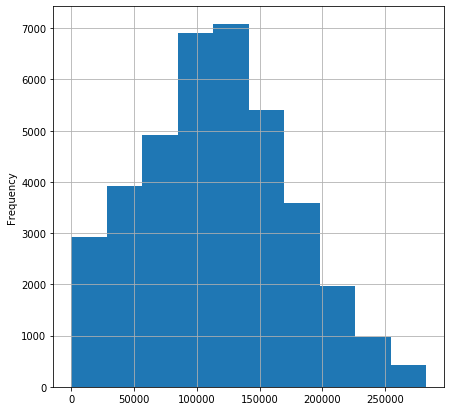

In [147]:
# Create a new histogram for the odometer parameter
new_vehicles_us['odometer'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


Without the outliers skewing the data in the 'odometer' column, the data looks more evenly distributed with a more normal distribution in which the peak lies near the center of the graph between 75,000-150,000 miles. However, in general, frequencies tend to be a little higher at lower mileage totals than the higher mileage totals.

## Ads lifetime

In [148]:
# Examine the descriptive statistics of the 'days_listed' column of the 'new_vehicles_us' dataframe
new_vehicles_us['days_listed'].describe()


count    38102.000000
mean        39.627579
std         28.123548
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

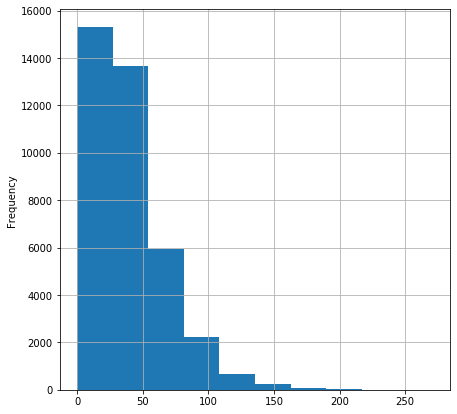

In [149]:
# Create a histogram of the 'days_listed' column to examine the frequencies of the values
new_vehicles_us['days_listed'].plot(kind='hist', figsize = (7, 7), bins = 10, grid = True);


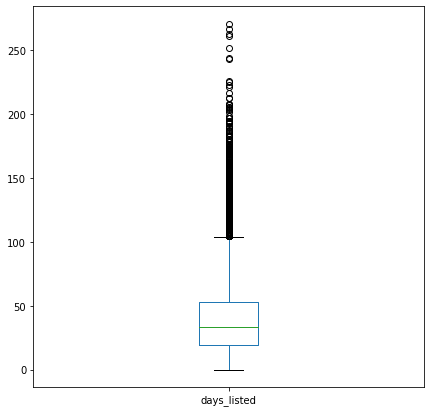

In [150]:
# Create a boxplot of the 'days_listed' column to examine the distribution of the data
new_vehicles_us['days_listed'].plot(kind='box', figsize = (7, 7));


According to the information above, the average time that a vehicle was listed for was about 39.6 days while the median time that a vehicle was listed for was about 33 days. These values indicate that there are outliers in the dataset with an abnormally high number of days that an ad was listed which is causing the average value to be pulled up higher than the median (or middle) value. This is confirmed by the histogram and boxplot which reveals quite a large number of extreme outliers. When ads were removed quickly (0-25th percentile) they only had a lifetime between 0-19 days while ads listed for an abnormally long time (75-100th percentile) had a lifetime betweeen 53-271 days.

## Average price per each type of vehicle

In [151]:
# Create a pivot table to display the number of ads posted for each type of vehicle
ads_per_type = pd.pivot_table(new_vehicles_us, index = 'type', values = 'date_posted', aggfunc = 'count')
display(ads_per_type)


,date_posted
type,
SUV,9337
bus,20
convertible,270
coupe,1591
hatchback,809
mini-van,918
offroad,150
other,185
pickup,4925


In [152]:
# Create a pivot table to display the average price for each type of vehicle
price_per_type = pd.pivot_table(new_vehicles_us, index = 'type', values = 'price', aggfunc = 'mean').sort_values(by = 'price')
display(price_per_type)


,price
type,
hatchback,6755.729295
sedan,6980.768383
mini-van,8122.911765
wagon,8901.094595
van,8964.843478
other,10296.313514
SUV,10507.212916
convertible,13060.737037
coupe,13555.048397


In [153]:
# Combine the two pivot tables by adding the number of ads posted to the 'price_per_type' table
price_per_type['number_of_ads'] = ads_per_type['date_posted']
price_per_type = price_per_type.sort_values(by = 'number_of_ads')
display(price_per_type)


,price,number_of_ads
type,,
bus,17563.300000,20
offroad,14576.013333,150
other,10296.313514,185
convertible,13060.737037,270
van,8964.843478,460
hatchback,6755.729295,809
mini-van,8122.911765,918
wagon,8901.094595,1184
coupe,13555.048397,1591


Pivot tables were generated for the number of ads and price by vehicle type and were then combined to form one table with data from both tables.

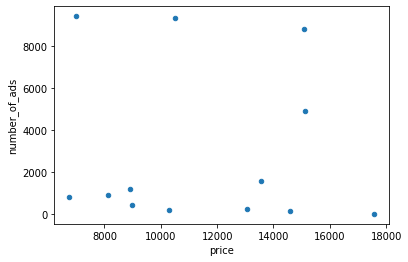

In [154]:
# Create a scatterplot of the 'price_per_type' table to show the relationship between the number of ads placed and the price by vehicle type
price_per_type.plot.scatter(x = 'price', y = 'number_of_ads');


A scatterplot of the final 'price_per_type' table was graphed to examine whether or not the price of a vehicle by type is dependent on the number of ads by vehicle type. According to the above plot, there does not seem to be a trend/relationship between the two factors which indicates that they do not seem to be dependent on each other.

The two vehicle types with the greatest number of ads turned out to be SUV (9,337 ads) and sedan (9,438 ads).

## Price factors

In order to determine which factors impact price the most, the two most popular vehicles types based on the previous analysis--SUV and sedan--will be studied to determine whether price depends on age, mileage, condition, transmission type, and color.

In [155]:
# Create a slice of the new_vehicles_us dataframe that only includes data on SUV vehicle types
suv_data = new_vehicles_us[new_vehicles_us['type'] == 'SUV']
display(suv_data)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,age,avg_mileage,condition_cat
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,6,2018,7,20714,2
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18246,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,NaN,1,2018-07-16,19,0,7,2018,6,17362,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381,3
14,12990,2009,gmc yukon,excellent,8,gas,132285,automatic,SUV,black,1,2019-01-31,24,3,1,2019,10,13228,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51494,7999,2009,chevrolet equinox,excellent,6,gas,95021,automatic,SUV,silver,1,2019-01-03,8,3,1,2019,10,9502,3
51495,9500,2012,chevrolet traverse,good,6,gas,144500,automatic,SUV,NaN,1,2019-03-05,1,1,3,2019,7,20643,2
51496,4999,2002,toyota 4runner,excellent,6,gas,177901,automatic,SUV,NaN,1,2018-05-26,59,5,5,2018,16,11119,3
51500,6995,2012,buick enclave,excellent,6,gas,157000,automatic,SUV,white,1,2018-08-04,17,5,8,2018,6,26167,3


For the purpose of this analysis, a slice of the new_vehicles_us dataframe that only includes data on SUV vehicle types was created and was named 'suv_data'

In [156]:
# Check the counts of each value in the 'paint_color' column of 'suv_data' to ensure there is sufficient data (at least 50 rows) to be included in the analysis
suv_data['paint_color'].value_counts()


black     1647
white     1464
silver    1211
grey       903
blue       782
red        696
green      320
brown      276
custom     231
orange      64
yellow      32
purple      31
Name: paint_color, dtype: int64

In [157]:
# Check the counts of each value in the 'transmission' column of 'suv_data' to ensure there is sufficient data (at least 50 rows) to be included in the analysis
suv_data['transmission'].value_counts()


automatic    8862
manual        351
other         124
Name: transmission, dtype: int64

In [158]:
# Check the counts of each value in the 'condition_cat' column of 'suv_data' to ensure there is sufficient data (at least 50 rows) to be included in the analysis
suv_data['condition_cat'].value_counts()


3    4930
2    3302
4     864
1     217
5      13
0      11
Name: condition_cat, dtype: int64

In order to ensure that the analysis of the categorical variables in 'suv_data' is valid, the count of each category was examined to see if any contained less than 50 data points. Since the 'yellow' and 'purple' categories in 'paint_color' contain 32 and 31 data points respectively, and the 'new' and 'salvage' categories in 'condition_cat' contain 13 and 11 data points respectively, they will not be included in the boxplot analysis.

In [159]:
# Create a slice of 'suv_data' for plotting the matrix
suv_scatter = suv_data[['price', 'age', 'odometer', 'condition_cat']]
suv_scatter.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9337 entries, 0 to 51502
Data columns (total 4 columns):
price            9337 non-null int64
age              9337 non-null Int64
odometer         9337 non-null Int64
condition_cat    9337 non-null int64
dtypes: Int64(2), int64(2)
memory usage: 383.0 KB


In [160]:
# Convert 'suv_scatter' columns into float values to prevent errors when plotting the matrix
suv_scatter = suv_scatter.astype(float)
suv_scatter.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9337 entries, 0 to 51502
Data columns (total 4 columns):
price            9337 non-null float64
age              9337 non-null float64
odometer         9337 non-null float64
condition_cat    9337 non-null float64
dtypes: float64(4)
memory usage: 364.7 KB


A slice of 'suv_data' containing the columns that are necessary for plotting the scatterplot matrix was created and called 'suv_scatter'. The columns in 'suv_scatter' were all converted to float types to prevent errors when plotting the matrix.

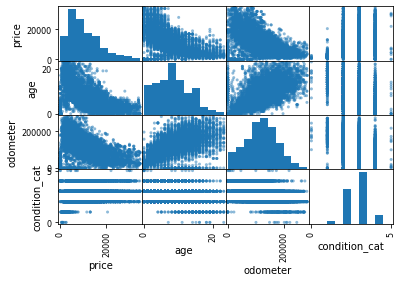

In [161]:
# Create a matrix of scatter plots for 'suv_scatter' to compare the variables of interest and their impact on price
pd.plotting.scatter_matrix(suv_scatter);


In [162]:
# Create a correlation plot for 'suv_data'
suv_data.corr()


,price,model_year,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,age,avg_mileage,condition_cat
price,1.000000,0.603277,-0.008680,-0.514459,0.119590,-0.020636,0.006706,-0.005697,-0.003523,-0.601853,0.283830,0.258658
model_year,0.603277,1.000000,-0.269585,-0.620907,-0.067725,-0.022994,-0.003529,-0.017770,0.014954,-0.995718,0.557232,0.319779
cylinders,-0.008680,-0.269585,1.000000,0.229197,0.114163,0.022694,-0.008177,-0.001525,-0.003865,0.268446,-0.140468,-0.093662
odometer,-0.514459,-0.620907,0.229197,1.000000,0.024065,0.015040,0.006040,0.009122,-0.006309,0.618523,0.021995,-0.326592
is_4wd,0.119590,-0.067725,0.114163,0.024065,1.000000,-0.009819,0.030106,0.000059,-0.001212,0.067417,-0.040159,-0.004864
days_listed,-0.020636,-0.022994,0.022694,0.015040,-0.009819,1.000000,-0.005675,-0.005896,-0.005609,0.022409,-0.017047,-0.020651
day_of_week,0.006706,-0.003529,-0.008177,0.006040,0.030106,-0.005675,1.000000,0.028739,-0.024077,0.001293,-0.010126,0.006905
month,-0.005697,-0.017770,-0.001525,0.009122,0.000059,-0.005896,0.028739,1.000000,-0.819858,-0.058080,0.096814,-0.001661
year,-0.003523,0.014954,-0.003865,-0.006309,-0.001212,-0.005609,-0.024077,-0.819858,1.000000,0.077543,-0.114430,0.001121
age,-0.601853,-0.995718,0.268446,0.618523,0.067417,0.022409,0.001293,-0.058080,0.077543,1.000000,-0.567335,-0.318748


A scatterplot matrix and correlation plot were generated in order to examine the relationship between price and the numeric columns (age, mileage, and condition) in 'suv_data'.

Based on the results of the analysis on SUV type vehicles, there seems to be a negative correlation that exists between price and both age (-0.600982) and mileage (-0.513200). Older age and higher mileage tends to cause lower pricing for vehicles. The condition did not exhibit any meaningful trends and yielded a low level of correlation (0.257126) likely because the condition is still technically a categorical variable although numeric values were assigned to represent the categories. Therefore, it will be better to examine the relationship between price and condition using boxplots instead.

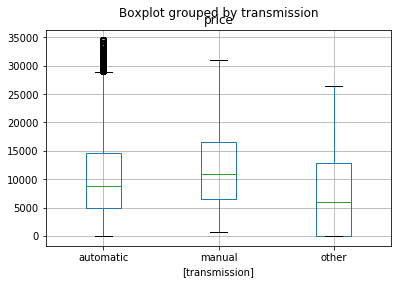

In [163]:
# Create boxplots to compare transmission and price in 'suv_data'
suv_data.boxplot(column = ['price'], by = ['transmission']);


Based on the above boxplot comparison of transmission type and price for SUV type vehicles, manual transmission vehicles are priced slightly higher than automatic vehicles. Vehicles with transmission types in the 'other' category have lower prices than the manual and automatic transmission vehicles.

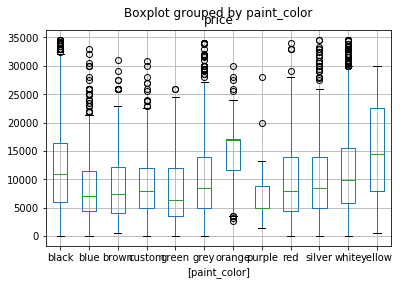

In [164]:
# Create boxplots to compare paint color and price in 'suv_data'
suv_data.boxplot(column = ['price'], by = ['paint_color']);


Based on the above boxplot comparison of paint color and price for SUV type vehicles, orange, white, and black vehicles are priced slightly higher than the other paint colors. It should be noted, however, that the 'orange' category had only 64 data points which is why the data may be a little more unreliable than the other categories.

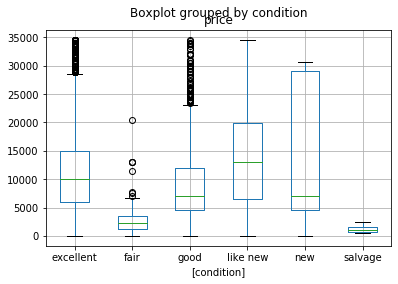

In [165]:
# Create boxplots to compare condition and price in 'suv_data'
suv_data.boxplot(column = ['price'], by = ['condition']);


Based on the above boxplot comparison of condition and price for SUV type vehicles, the 'like new' vehicles were priced the highest, followed by 'excellent', 'good', and 'fair' vehicles.

In [166]:
# Create a slice of the new_vehicles_us dataframe that only includes data on sedan vehicle types
sedan_data = new_vehicles_us[new_vehicles_us['type'] == 'sedan']
display(sedan_data)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,age,avg_mileage,condition_cat
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404,3
11,8990,2012,honda accord,excellent,4,gas,111142,automatic,sedan,grey,0,2019-03-28,29,3,3,2019,7,15877,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,0,2018-08-10,63,4,8,2018,13,8477,3
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627,4
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,11,2018,16,11344,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222,3


For the purpose of this analysis, a slice of the new_vehicles_us dataframe that only includes data on sedan vehicle types was created and was named 'sedan_data'

In [167]:
# Check the counts of each value in the 'paint_color' column of 'sedan_data' to ensure there is sufficient data (at least 50 rows) to be included in the analysis
sedan_data['paint_color'].value_counts()


silver    1605
black     1383
grey      1268
white     1193
blue       963
red        733
custom     224
brown      190
green      150
purple      20
yellow      15
orange       8
Name: paint_color, dtype: int64

In [168]:
# Check the counts of each value in the 'transmission' column of 'sedan_data' to ensure there is sufficient data (at least 50 rows) to be included in the analysis
sedan_data['transmission'].value_counts()


automatic    8866
manual        464
other         108
Name: transmission, dtype: int64

In [169]:
# Check the counts of each value in the 'condition_cat' column of 'sedan_data' to ensure there is sufficient data (at least 50 rows) to be included in the analysis
sedan_data['condition_cat'].value_counts()


3    4806
2    3340
4    1010
1     217
5      35
0      30
Name: condition_cat, dtype: int64

In order to ensure that the analysis of the categorical variables in 'sedan_data' is valid, the count of each category was examined to see if any contained less than 50 data points. Since the 'purple', 'yellow', and 'orange' categories in 'paint_color' contain 20, 15, and 8 data points respectively and the 'new' and 'salvage' categories in 'condition_cat' contain 35 and 30 data points respectively, they will not be included in the boxplot analysis.

In [170]:
# Create a slice of the 'sedan_data' for plotting the matrix
sedan_scatter = sedan_data[['price', 'age', 'odometer', 'condition_cat']]
sedan_scatter.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9438 entries, 2 to 51523
Data columns (total 4 columns):
price            9438 non-null int64
age              9438 non-null Int64
odometer         9438 non-null Int64
condition_cat    9438 non-null int64
dtypes: Int64(2), int64(2)
memory usage: 387.1 KB


In [171]:
# Convert 'sedan_scatter' columns into float values to prevent errors when plotting the matrix
sedan_scatter = sedan_scatter.astype(float)
sedan_scatter.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9438 entries, 2 to 51523
Data columns (total 4 columns):
price            9438 non-null float64
age              9438 non-null float64
odometer         9438 non-null float64
condition_cat    9438 non-null float64
dtypes: float64(4)
memory usage: 368.7 KB


A slice of 'sedan_data' containing the columns that are necessary for plotting the scatterplot matrix was created and called 'sedan_scatter'. The columns in 'sedan_scatter' were all converted to float types to prevent errors when plotting the matrix.

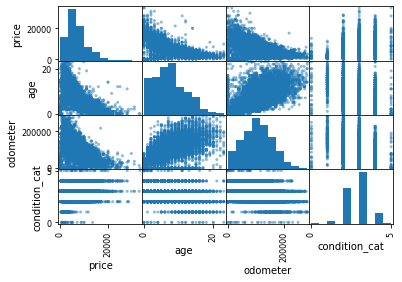

In [172]:
# Create a matrix of scatter plots for 'sedan_scatter' to compare the variables of interest and their impact on price
pd.plotting.scatter_matrix(sedan_scatter);


In [173]:
# Create a correlation plot for 'sedan_data'
sedan_data.corr()


,price,model_year,cylinders,odometer,is_4wd,days_listed,day_of_week,month,year,age,avg_mileage,condition_cat
price,1.000000,0.642457,-0.044052,-0.556528,0.032360,0.002215,-0.006052,-0.021333,0.017063,-0.638808,0.289867,0.292589
model_year,0.642457,1.000000,-0.118770,-0.612058,0.066542,-0.002908,0.002702,-0.022999,0.019408,-0.995032,0.515687,0.315400
cylinders,-0.044052,-0.118770,1.000000,0.071817,0.223430,-0.004742,-0.002173,-0.002326,-0.001975,0.118213,-0.071962,-0.054078
odometer,-0.556528,-0.612058,0.071817,1.000000,-0.055958,0.005517,0.002081,0.017514,-0.010101,0.609194,0.083390,-0.327945
is_4wd,0.032360,0.066542,0.223430,-0.055958,1.000000,0.014320,-0.020603,0.010197,-0.006528,-0.066990,0.012733,0.014962
days_listed,0.002215,-0.002908,-0.004742,0.005517,0.014320,1.000000,0.006500,-0.010933,0.015229,0.004415,-0.004365,-0.007842
day_of_week,-0.006052,0.002702,-0.002173,0.002081,-0.020603,0.006500,1.000000,-0.003137,-0.008383,-0.003529,0.009678,-0.004028
month,-0.021333,-0.022999,-0.002326,0.017514,0.010197,-0.010933,-0.003137,1.000000,-0.817556,-0.058481,0.112887,-0.009470
year,0.017063,0.019408,-0.001975,-0.010101,-0.006528,0.015229,-0.008383,-0.817556,1.000000,0.080228,-0.135974,0.011983
age,-0.638808,-0.995032,0.118213,0.609194,-0.066990,0.004415,-0.003529,-0.058481,0.080228,1.000000,-0.528836,-0.313249


A scatterplot matrix and correlation plot were generated in order to examine the relationship between price and the numeric columns (age, mileage, and condition) in 'sedan_data'.

Based on the results of the analysis on sedan type vehicles, there seems to be a negative correlation that exists between price and both age (-0.638808) and mileage (-0.556528). Older age and higher mileage tends to cause lower pricing for vehicles. The condition did not exhibit any meaningful trends and yielded a low level of correlation (0.292589) likely because the condition is still technically a categorical variable although numeric values were assigned to represent the categories. Therefore, it will be better to examine the relationship between price and condition using boxplots instead.

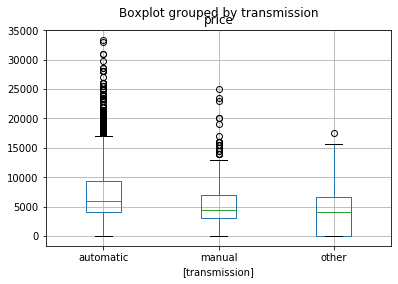

In [174]:
# Create boxplots to compare transmission and price in 'sedan_data'
sedan_data.boxplot(column = ['price'], by = ['transmission']);


Based on the above boxplot comparison of transmission type and price for sedan type vehicles, automatic transmission vehicles are priced slightly higher than manual vehicles. Vehicles with transmission types in the 'other' category have lower prices than the manual and automatic transmission vehicles.

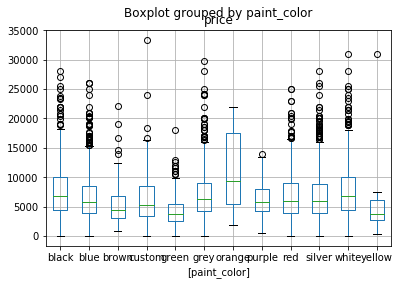

In [175]:
# Create boxplots to compare paint color and price in 'sedan_data'
sedan_data.boxplot(column = ['price'], by = ['paint_color']);


Based on the above boxplot comparison of paint color and price for sedan type vehicles, white and black vehicles are priced slightly higher than the other paint colors. However, blue, grey, purple, red, and silver vehicles are similar and not much lower in price.

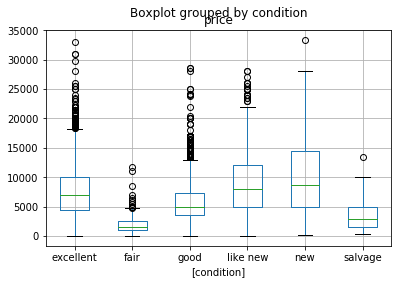

In [176]:
# Create boxplots to compare condition and price in 'sedan_data'
sedan_data.boxplot(column = ['price'], by = ['condition']);


Based on the above boxplot comparison of condition and price for sedan type vehicles, the 'like new' vehicles were priced the highest, followed by 'excellent', 'good', and 'fair' vehicles.

## General conclusion

**Data Cleaning:**

*Missing data:*

There were 5 columns that contain missing data in the dataset--'cylinders', 'is_4wd', 'model_year', 'odometer', and 'paint_color'. Only the 'cylinders' and 'is_4wd' columns were filled.

The 'cylinders' column was filled since they were relatively standardized based on the type of vehicle. The missing 'cylinders' values were filled with the median cylinder numbers by type.

The missing values in the 'is_4wd' column were simply vehicles that are not 4 wheel drive so they were filled in with a value of 0.

Due to the highly variable and subjective nature of the 'model_year', 'odometer', and 'paint_color' columns, as well as the low level of correlation that is indicated for the numeric columns based on the Pearson correlation coefficients above, they were not filled.

*Incorrect data types:*

The float values in the 'model_year', 'cylinders', 'odometer', and 'is_4wd' columns were changed to integer values in order to increase the efficiency of the analysis and the string values in the 'date_posted' column were changed to datetime values to allow for greater functionality in the analysis.

*Enriching the data:*

Columns were created to include the day of week, month, and year of each posting using the 'date_posted' column. The 'age' and 'avg_mileage' columns were generated by making calculations using existing data and the 'condition_cat' column was generated by assigning numeric values to the categorical values in the 'condition' column.

**Data Analysis:**

*Studying core parameters/removing outliers:*

The core parameters, price, age, mileage, number of cylinders, and condition of each vehicle were studied using histograms, boxplots, and scatterplots. Due to the observation of outliers that were skewing the data to the right, they were removed by calculating the lower and upper bounds and excluding data that lied beyond these bounds for the remainder of the analysis.

*Price factors analysis:*

Based on the results of the correlation analysis on SUV type vehicles, there seems to be a negative correlation that exists between price and both age (-0.600982) and mileage (-0.513200). Older age and higher mileage tends to cause lower pricing for vehicles. The condition did not exhibit any meaningful trends and yielded a low level of correlation (0.257126). Based on the results of the boxplot analyses, manual transmission vehicles are priced slightly higher than automatic vehicles, orange, white, and black vehicles are priced slightly higher than the other paint colors, and the 'like new' vehicles were priced the highest, followed by 'excellent', 'good', and 'fair' vehicles.

Based on the results of the correlation analysis on sedan type vehicles, there seems to be a negative correlation that exists between price and both age (-0.638808) and mileage (-0.556528). Older age and higher mileage tends to cause lower pricing for vehicles. The condition did not exhibit any meaningful trends and yielded a low level of correlation (0.292589). Based on the results of the boxplot analyses, automatic transmission vehicles are priced slightly higher than manual vehicles, white and black vehicles are priced slightly higher than the other paint colors, and the 'like new' vehicles were priced the highest, followed by 'excellent', 'good', and 'fair' vehicles.

Overall, the analyses for the SUV and sedan types revealed very similar price trends.